In [ ]:
#default_exp common.clean_data

# Cleaning data
> Uses trained learner to help cleaning data.

In [ ]:
from fastai2.vision.all import *
from fastai2.vision.widgets import *

In [ ]:
source = untar_data(URLs.MNIST_TINY)

In [ ]:
dblock = DataBlock((ImageBlock(PILImageBW), CategoryBlock), get_items=get_image_files,
                   splitter=GrandparentSplitter(),
                   get_y=parent_label,
                   batch_tfms=[Normalize.from_stats(*imagenet_stats)])

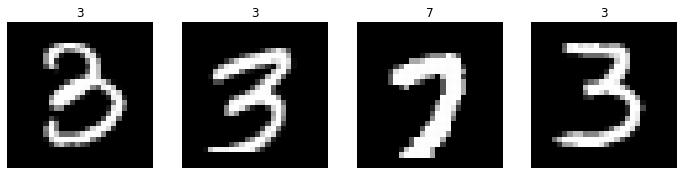

In [ ]:
dls = dblock.dataloaders(source)
dls.show_batch(max_n=4, nrows=1)

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=[accuracy])
learn.fine_tune(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.913778,0.274617,0.917024,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.383067,0.251726,0.902718,00:01


In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner

`ImageClassifierCleaner` doesn't actually do the deleting or changing of labels for you; it just returns the indices of items to change. So, for instance, to delete (unlink) all images selected for deletion, we would run:

In [ ]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()

To move images where we've selected a different category, we would run:

In [ ]:
for idx,cat in cleaner.change(): shutil.move(cleaner.fns[idx], source/cat)